In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Customer_Churn/data/train_no_missing_encoded.csv')
val=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Customer_Churn/data/val_no_missing_encoded.csv')
test=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Customer_Churn/data/test_no_missing_encoded.csv')

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import shap



In [4]:
train.shape, val.shape, test.shape

((4059, 25), (508, 25), (507, 25))

In [5]:
train['churn'].value_counts()

churn
0.0    3386
1.0     673
Name: count, dtype: int64

In [6]:
train.head()

,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,...,preferredpaymentmode_COD,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Male,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Others,maritalstatus_Single
0,1.0,1.0,2.0,29.0,3.0,4.0,3.0,3.0,1.0,20.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,24.0,1.0,17.0,2.0,4.0,4.0,4.0,0.0,16.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,7.0,2.0,34.0,3.0,4.0,3.0,2.0,0.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,10.0,1.0,33.0,4.0,4.0,3.0,8.0,0.0,15.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,24.0,1.0,24.0,3.0,5.0,5.0,7.0,0.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying SMOTE to the training data

In [7]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Get features and target
X = train.drop('churn', axis=1)
y = train['churn']

# Apply SMOTE to generate balanced dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Create new balanced dataframe
train_smote = pd.DataFrame(X_smote, columns=X.columns)
train_smote['churn'] = y_smote

print("Original dataset shape:", train.shape)
print("New balanced dataset shape:", train_smote.shape)
print("\nClass distribution:")
print(train_smote['churn'].value_counts())

Original dataset shape: (4059, 25)
New balanced dataset shape: (6772, 25)

Class distribution:
churn
1.0    3386
0.0    3386
Name: count, dtype: int64


In [8]:
train_smote.head()

,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,...,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Male,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Others,maritalstatus_Single,churn
0,1.0,2.0,29.0,3.0,4.0,3.0,3.0,1.0,20.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,24.0,1.0,17.0,2.0,4.0,4.0,4.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,7.0,2.0,34.0,3.0,4.0,3.0,2.0,0.0,21.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10.0,1.0,33.0,4.0,4.0,3.0,8.0,0.0,15.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,1.0,24.0,3.0,5.0,5.0,7.0,0.0,16.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling the Data

In [9]:
# Create train split
X_train = train_smote.drop('churn', axis=1)
y_train = train_smote['churn']

# Create validation split
X_val = val.drop('churn', axis=1)
y_val = val['churn']

# Create test split
X_test = test.drop('churn', axis=1)
y_test = test['churn']

print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

Shapes:
X_train: (6772, 24)
X_val: (508, 24)
X_test: (507, 24)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Transform validation and test data
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

test_scaled = scaler.transform(test.drop('churn', axis=1))
test_scaled = pd.DataFrame(test_scaled, columns=X_train.columns, index=test.index)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and fit logistic regression model
lr = LogisticRegression(random_state=42)

lr.fit(X_train_scaled, y_train)

# Make predictions on validation set
val_pred = lr.predict(X_val_scaled)

# Print results
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("\nClassification Report:")
print(classification_report(y_val, val_pred))

Validation Accuracy: 0.8011811023622047

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       424
         1.0       0.44      0.76      0.56        84

    accuracy                           0.80       508
   macro avg       0.69      0.79      0.72       508
weighted avg       0.86      0.80      0.82       508



In [15]:
param_grid_lr = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
    'penalty': ['l2']
}

# Dictionary to store results
results = {}

# Try each parameter combination
best_f1_lr = 0
best_params_lr = None
best_model_lr = None

# Loop through each parameter combination
for solver in param_grid_lr['solver']:
    for C in param_grid_lr['C']:
        for max_iter in param_grid_lr['max_iter']:
            # Train the model with current parameters
            model = LogisticRegression(
                random_state=42,
                solver=solver,
                C=C,
                max_iter=max_iter,
                penalty='l2'
            )
            
            # Fit on training data
            model.fit(X_train_scaled, y_train)
            
            # Predict on validation data
            val_pred = model.predict(X_val_scaled)
            
            # Calculate F1 score on validation set
            val_f1 = f1_score(y_val, val_pred)
            
            # Store all metrics
            params = {'solver': solver, 'C': C, 'max_iter': max_iter, 'penalty': 'l2'}
            results[str(params)] = {
                'params': params,
                'val_accuracy': accuracy_score(y_val, val_pred),
                'val_precision': precision_score(y_val, val_pred),
                'val_recall': recall_score(y_val, val_pred),
                'val_f1': val_f1
            }
            
            # Update best parameters if we have a better F1 score
            if val_f1 > best_f1_lr:
                best_f1_lr = val_f1
                best_params_lr = params
                best_model_lr = model

# Print best parameters and scores
print("Best parameters:", best_params_lr)
print("\nBest validation set metrics:")
print(f"Accuracy: {results[str(best_params_lr)]['val_accuracy']:.3f}")
print(f"Precision: {results[str(best_params_lr)]['val_precision']:.3f}")
print(f"Recall: {results[str(best_params_lr)]['val_recall']:.3f}")
print(f"F1: {results[str(best_params_lr)]['val_f1']:.3f}")

# Best model is available as best_model

Best parameters: {'solver': 'lbfgs', 'C': 10, 'max_iter': 100, 'penalty': 'l2'}

Best validation set metrics:
Accuracy: 0.803
Precision: 0.444
Recall: 0.762
F1: 0.561


## Support Vector Classifier

In [16]:
# Initialize SVC with balanced class weights
svc = SVC(kernel='rbf', random_state=42)

# Fit the model
svc.fit(X_train_scaled, y_train)

# Make predictions on validation set
val_predictions = svc.predict(X_val_scaled)

# Print results
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("\nClassification Report:")
print(classification_report(y_val, val_predictions))

Validation Accuracy: 0.9173228346456693

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       424
         1.0       0.69      0.89      0.78        84

    accuracy                           0.92       508
   macro avg       0.84      0.91      0.87       508
weighted avg       0.93      0.92      0.92       508



In [17]:
# Define parameter grid for SVM
param_grid_svc = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

# Dictionary to store results
results_svc = {}

# Try each parameter combination
best_f1_svc = 0
best_params_svc = None
best_model_svc = None

# Loop through each parameter combination
for kernel in param_grid_svc['kernel']:
    for C in param_grid_svc['C']:
        for gamma in param_grid_svc['gamma']:
            # Train the model with current parameters
            model = SVC(
                random_state=42,
                kernel=kernel,
                C=C,
                gamma=gamma
            )
            
            # Fit on training data
            model.fit(X_train_scaled, y_train)
            
            # Predict on validation data
            val_pred = model.predict(X_val_scaled)
            
            # Calculate F1 score on validation set
            val_f1 = f1_score(y_val, val_pred)
            
            # Store all metrics
            params = {'kernel': kernel, 'C': C, 'gamma': gamma}
            results[str(params)] = {
                'params': params,
                'val_accuracy': accuracy_score(y_val, val_pred),
                'val_precision': precision_score(y_val, val_pred),
                'val_recall': recall_score(y_val, val_pred),
                'val_f1': val_f1
            }
            
            # Update best parameters if we have a better F1 score
            if val_f1 > best_f1_svc:
                best_f1_svc = val_f1
                best_params_svc = params
                best_model_svc = model

# Print best parameters and scores
print("Best parameters:", best_params_svc)
print("\nBest validation set metrics:")
print(f"Accuracy: {results[str(best_params_svc)]['val_accuracy']:.3f}")
print(f"Precision: {results[str(best_params_svc)]['val_precision']:.3f}")
print(f"Recall: {results[str(best_params_svc)]['val_recall']:.3f}")
print(f"F1: {results[str(best_params_svc)]['val_f1']:.3f}")

# Best model is available as best_model

Best parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}

Best validation set metrics:
Accuracy: 0.980
Precision: 0.940
Recall: 0.940
F1: 0.940


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier with specified parameters
rf_clf = RandomForestClassifier(n_estimators=100, 
                               class_weight='balanced',
                               random_state=42)

# Fit the model
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on validation set
rf_val_pred = rf_clf.predict(X_val_scaled)

# Print results
print("Validation Accuracy:", accuracy_score(y_val, rf_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, rf_val_pred))

Validation Accuracy: 0.952755905511811

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       424
         1.0       0.93      0.77      0.84        84

    accuracy                           0.95       508
   macro avg       0.94      0.88      0.91       508
weighted avg       0.95      0.95      0.95       508



In [19]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Dictionary to store results
results_rf = {}

# Try each parameter combination
best_f1_rf = 0
best_params_rf = None
best_model_rf = None

# Loop through parameter combinations
for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                for max_features in param_grid_rf['max_features']:
                    # Train the model with current parameters
                    model = RandomForestClassifier(
                        random_state=42,
                        class_weight='balanced',
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features
                    )
                    
                    # Fit on training data
                    model.fit(X_train_scaled, y_train)
                    
                    # Predict on validation data
                    val_pred = model.predict(X_val_scaled)
                    
                    # Calculate F1 score on validation set
                    val_f1 = f1_score(y_val, val_pred)
                    
                    # Store all metrics
                    params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }
                    results_rf[str(params)] = {
                        'params': params,
                        'val_accuracy': accuracy_score(y_val, val_pred),
                        'val_precision': precision_score(y_val, val_pred),
                        'val_recall': recall_score(y_val, val_pred),
                        'val_f1': val_f1
                    }
                    
                    # Update best parameters if we have a better F1 score
                    if val_f1 > best_f1_rf:
                        best_f1_rf = val_f1
                        best_params_rf = params
                        best_model_rf = model

# Print best parameters and scores
print("Best parameters:", best_params_rf)
print("\nBest validation set metrics:")
print(f"Accuracy: {results_rf[str(best_params_rf)]['val_accuracy']:.3f}")
print(f"Precision: {results_rf[str(best_params_rf)]['val_precision']:.3f}")
print(f"Recall: {results_rf[str(best_params_rf)]['val_recall']:.3f}")
print(f"F1: {results_rf[str(best_params_rf)]['val_f1']:.3f}")

Best parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Best validation set metrics:
Accuracy: 0.953
Precision: 0.929
Recall: 0.774
F1: 0.844


## XG Boost

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define XGBoost parameters
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'scale_pos_weight': len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Handle class imbalance
    'random_state': 42
}

# Initialize and fit XGBoost classifier
xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
val_pred_xgb = xgb_model.predict(X_val_scaled)

# Print validation results
print("Validation Accuracy:", accuracy_score(y_val, val_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_val, val_pred_xgb))

Validation Accuracy: 0.9350393700787402

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       424
         1.0       0.85      0.74      0.79        84

    accuracy                           0.94       508
   macro avg       0.90      0.86      0.88       508
weighted avg       0.93      0.94      0.93       508



In [21]:
from sklearn.metrics import recall_score, f1_score

# Get predictions from all best models on test set
lr_test_pred = best_model_lr.predict(test_scaled)
svc_test_pred = best_model_svc.predict(test_scaled)
rf_test_pred = best_model_rf.predict(test_scaled)
xgb_test_pred = xgb_model.predict(test_scaled)

# Calculate metrics for each model

# Function to print metrics
def print_model_metrics(name, predictions):
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"Recall (Class 1): {recall:.3f}")
    print(f"F1 Score: {f1:.3f}\n")

# Print metrics for each model
print_model_metrics("Logistic Regression", lr_test_pred)
print_model_metrics("Support Vector Machine", svc_test_pred)
print_model_metrics("Random Forest", rf_test_pred)
print_model_metrics("XGBoost", xgb_test_pred)

Logistic Regression:
Recall (Class 1): 0.833
F1 Score: 0.583

Support Vector Machine:
Recall (Class 1): 0.940
F1 Score: 0.940

Random Forest:
Recall (Class 1): 0.881
F1 Score: 0.919

XGBoost:
Recall (Class 1): 0.810
F1 Score: 0.872



## AUC for the models 

In [22]:
from sklearn.metrics import roc_auc_score

# Calculate probabilities for each model
lr_probs = best_model_lr.predict(test_scaled)
svc_probs = best_model_svc.predict(test_scaled)
rf_probs = best_model_rf.predict(test_scaled)
xgb_probs = xgb_model.predict(test_scaled)

# Calculate AUC scores
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Print results
print("AUC Scores on Test Set:")
print(f"Logistic Regression: {lr_auc:.3f}")
print(f"Support Vector Machine: {svc_auc:.3f}")
print(f"Random Forest: {rf_auc:.3f}")
print(f"XGBoost: {xgb_auc:.3f}")

AUC Scores on Test Set:
Logistic Regression: 0.815
Support Vector Machine: 0.964
Random Forest: 0.937
XGBoost: 0.900


## SHAP test

In [28]:
explainer = shap.TreeExplainer(xgb_model)  # Use TreeExplainer for tree-based models like XGBoost
shap_values = explainer.shap_values(test_scaled)  # Calculate SHAP values for the test set

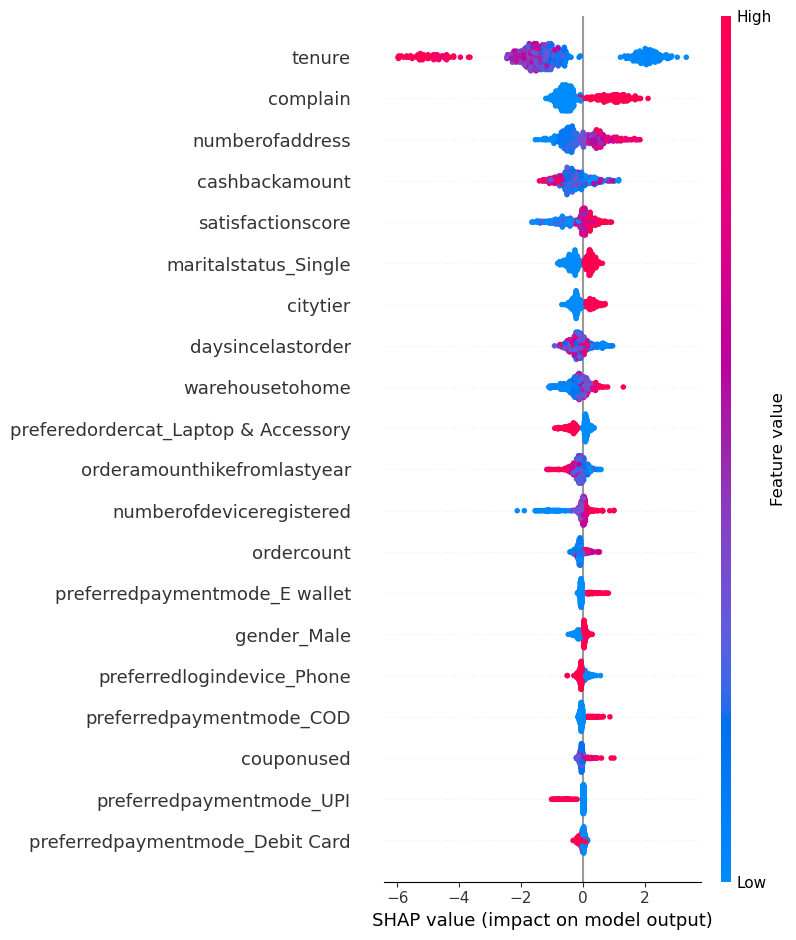

In [29]:
shap.summary_plot(shap_values, test_scaled)

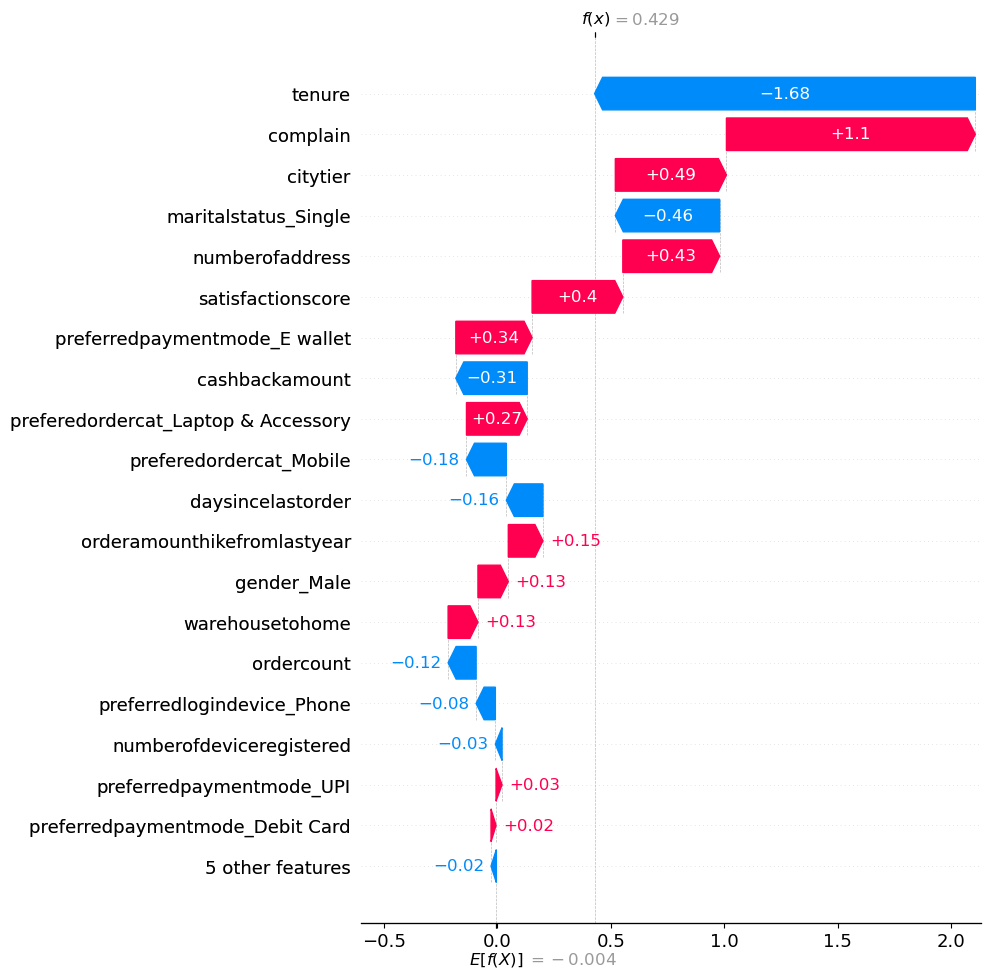

In [35]:
# Select a single instance to explain
instance_index = 0  # selecting a non outlier
instance = test_scaled.iloc[instance_index]

# Create a Waterfall Plot for the selected instance
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[instance_index, :], feature_names=X_test.columns, max_display=20)

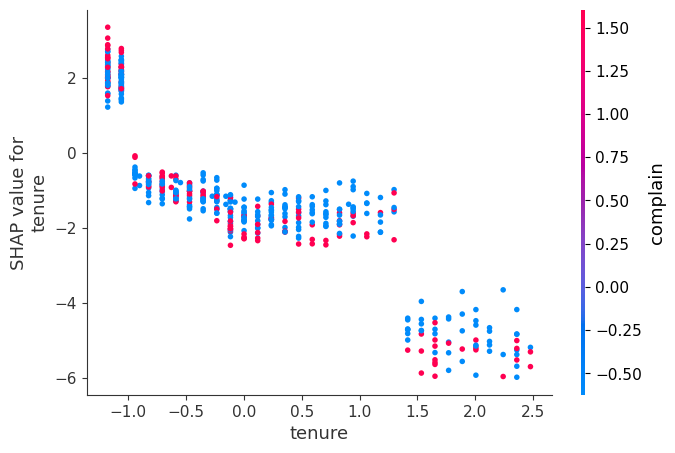

In [31]:
shap.dependence_plot("tenure", shap_values, test_scaled)

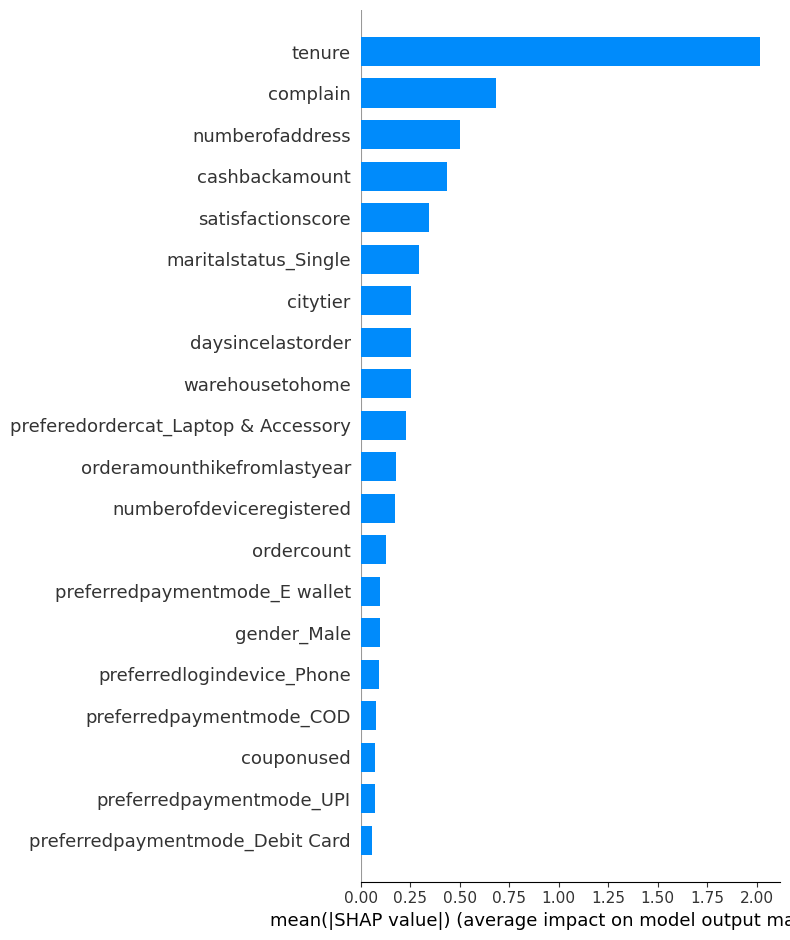

In [32]:
shap.summary_plot(shap_values, test_scaled, plot_type='bar', max_display=20)

In [33]:
import pickle

# Save the best SVC model
with open('best_svc_model_level1.pkl', 'wb') as f:
    pickle.dump(best_model_svc, f)

# Print confirmation message and model parameters
print("Best SVC model saved successfully!")
print("\nBest Parameters:")
print(best_params_svc)

Best SVC model saved successfully!

Best Parameters:
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
